In [170]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
%matplotlib inline

In [3]:
df=pd.read_csv('Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.sample(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
1348       1349    15576162      King          615    France    Male   32   
9708       9709    15604515  Yefremov          737   Germany  Female   22   
7215       7216    15684440   Monaldo          548   Germany    Male   32   
6787       6788    15596074   Keating          502    France    Male   37   
7132       7133    15694666  Thornton          707     Spain    Male   48   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1348       7   92199.84              1          1               1   
9708      10  111543.26              2          0               0   
7215       2   98986.28              1          1               1   
6787      10       0.00              1          1               1   
7132       8   88441.64              1          1               1   

      EstimatedSalary  Exited  
1348          2755.53       0  
9708        106327.85       0  
7215         55867.38       0  
6787         76642.68       0  
7132        119903.20       1

In [9]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [11]:
df.describe(include='object')

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

In [16]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [327]:
fig=px.pie(data_frame=df,values=df['Exited'].value_counts(),title='Targeted Classes counts and percent')
fig.update_layout(
    autosize=False,
    width=400,
    height=300,
)
fig.show()


In [51]:
df['Age'].value_counts().sort_values(ascending=False)

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

<Axes: title={'center': 'Distribution of Age'}, ylabel='Density'>

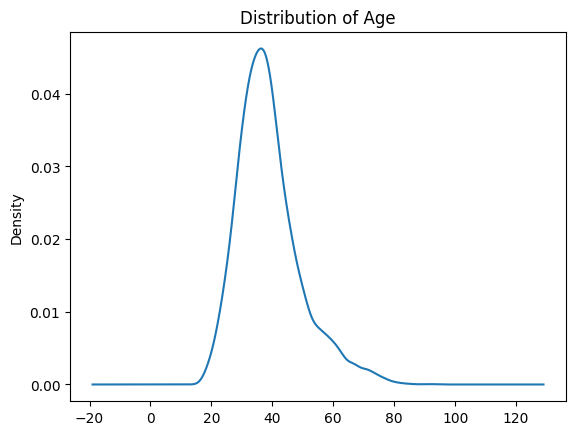

In [57]:
df['Age'].plot(kind='kde',title="Distribution of Age",xlabel='Age')

In [123]:
fig=px.histogram(df,x='Age',marginal="box",color='Gender',hover_data=df.columns,title="Distribution of Age and its relation with gender")
fig.show()

In [126]:
fig=px.histogram(df,x='Age',color='Exited',hover_data=df.columns,title="Distribution of Age and its relation with gender")
fig.show()

In [122]:
fig=px.histogram(data_frame=df,x=df['Geography'],color=df['Exited'],text_auto=True,labels=df['Geography'],histnorm='percent',title="Perecnet of Exited (Yes, No) by Country")
fig.show()

In [124]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

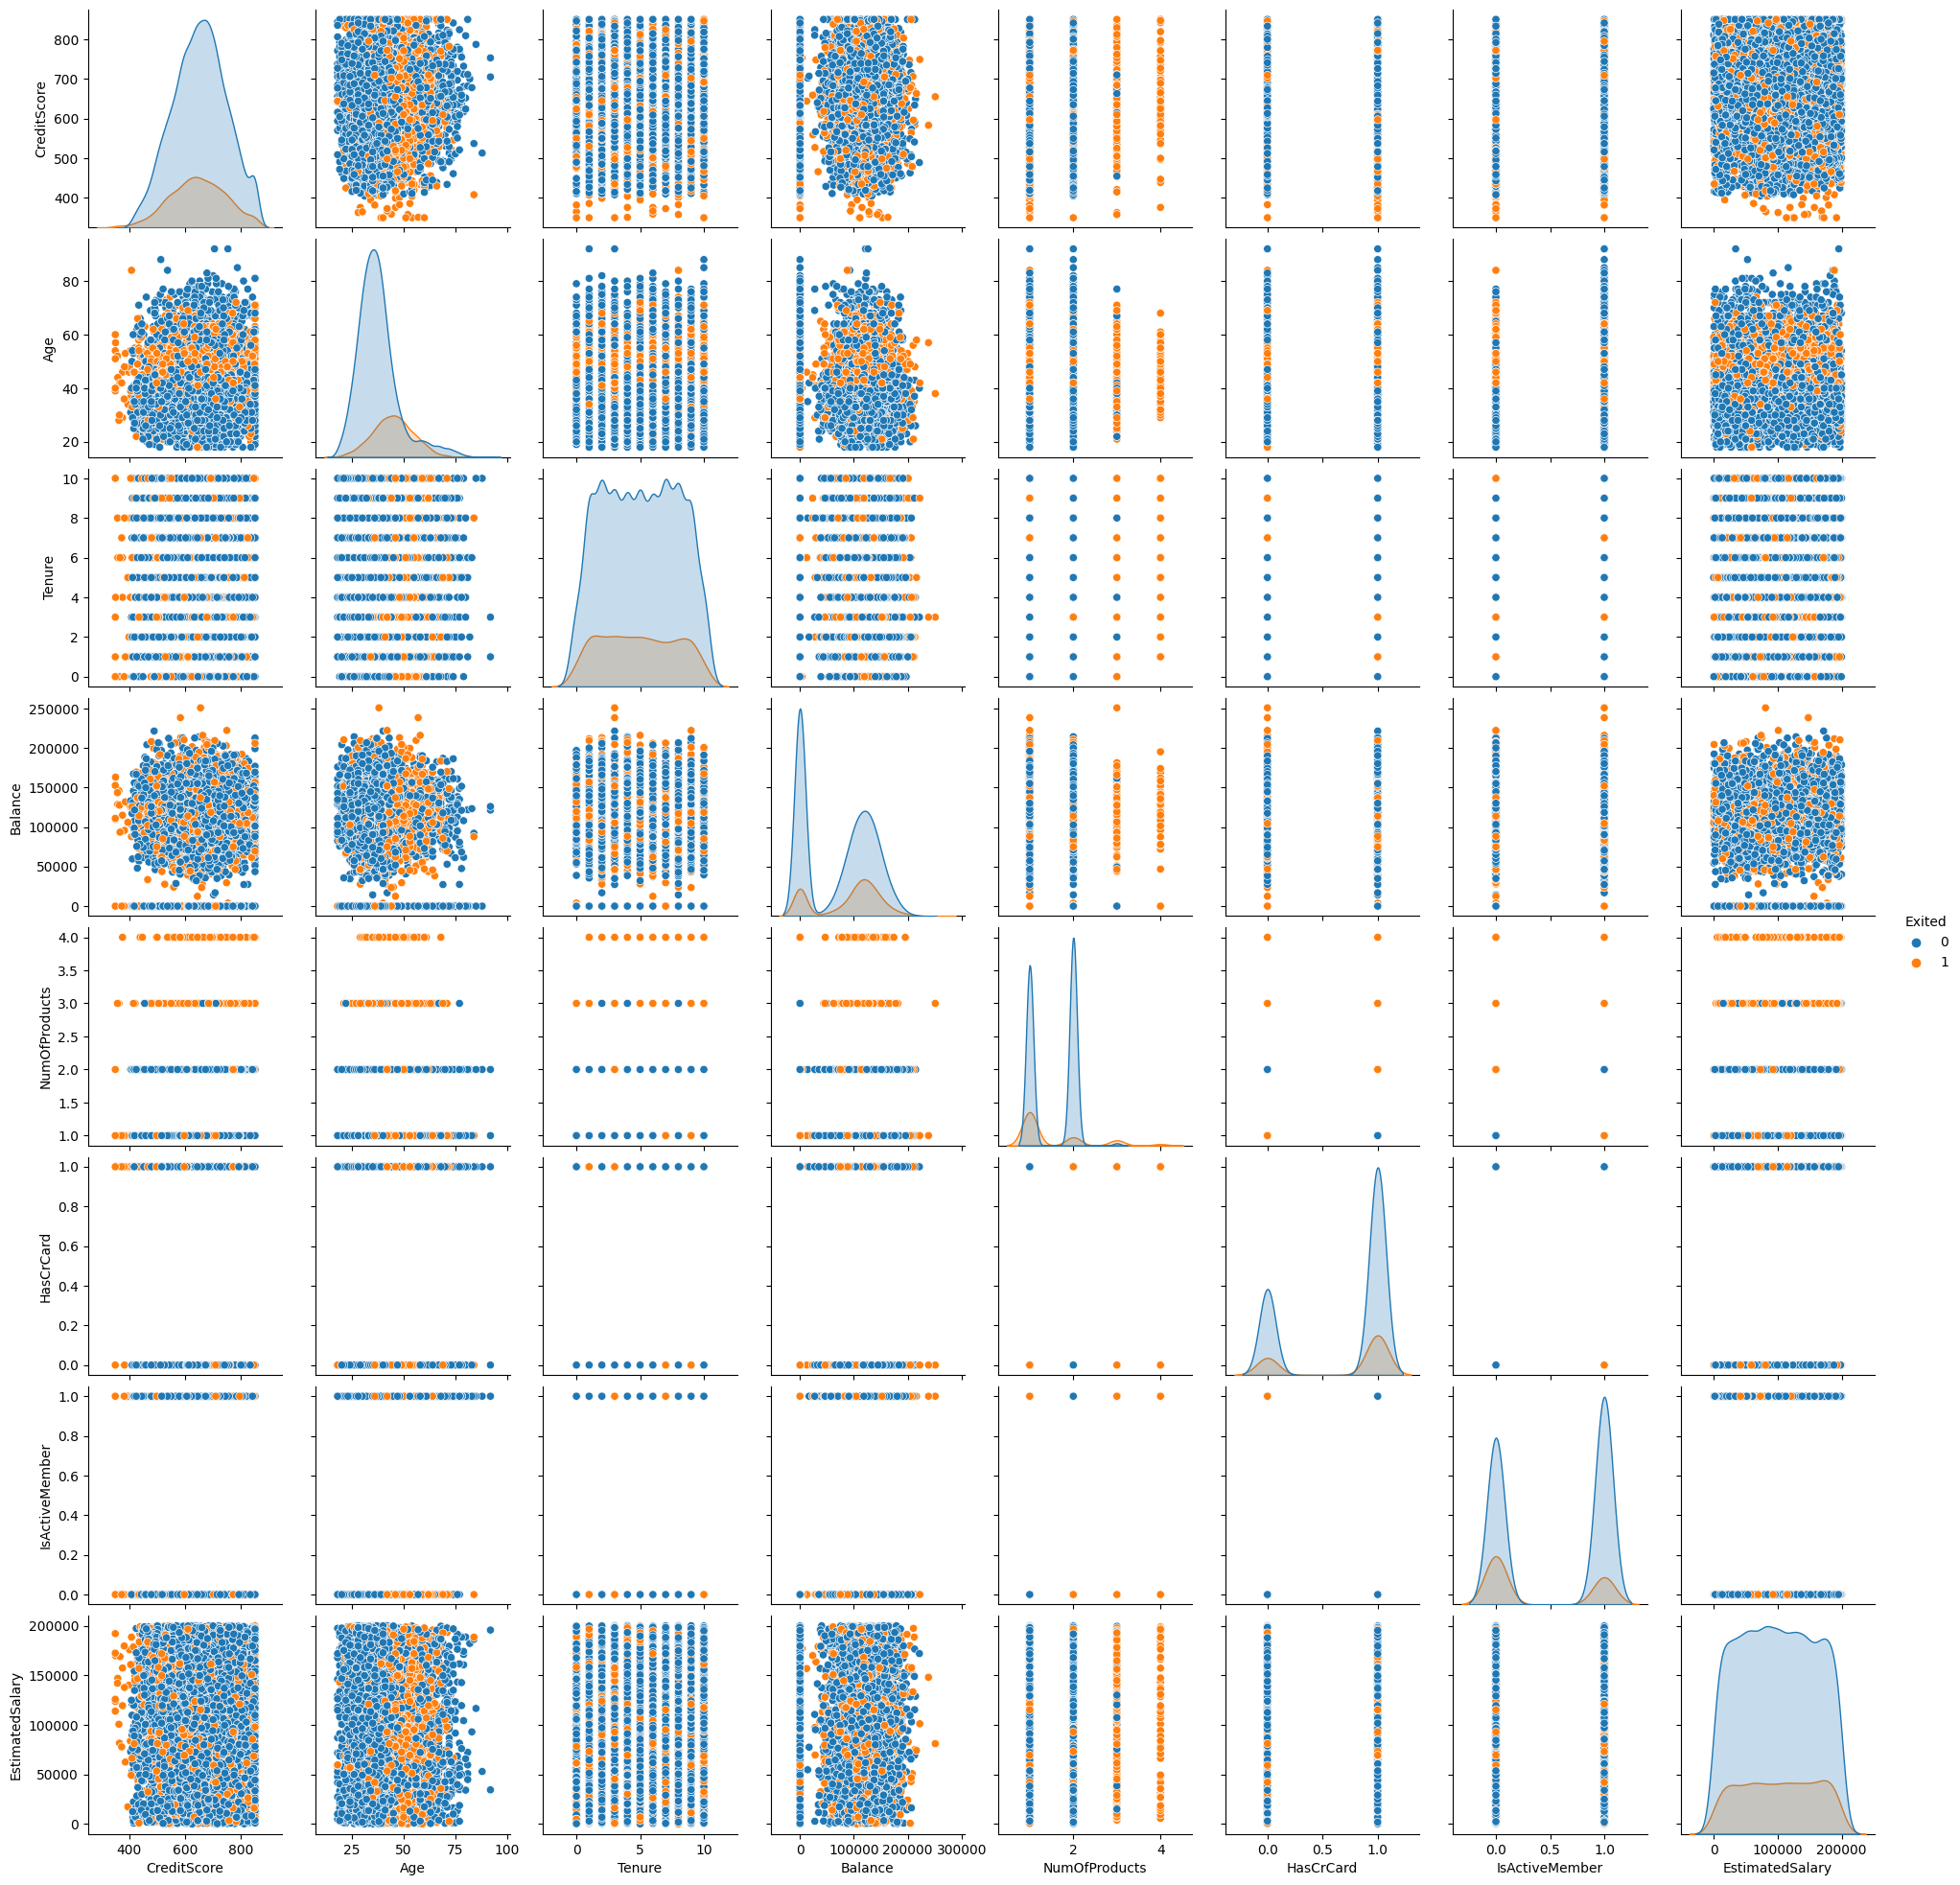

In [133]:
sns.pairplot(df.drop(['RowNumber','CustomerId','Surname','Gender','Geography'],axis=1),hue='Exited')

In [136]:
fig=px.scatter_matrix(data_frame=df,dimensions=df.drop(['RowNumber','CustomerId','Surname','Gender','Geography'],axis=1),color='Exited')
fig.update_layout(autosize=False,
    width=1600,
    height=800,)
fig.show()

In [145]:
px.histogram(data_frame=df,x=df['CreditScore'],color=df['Exited'],facet_row='Exited')

In [328]:
px.histogram(data_frame=df,x=df['EstimatedSalary'],color=df['Exited'],histfunc='sum')

In [152]:
px.histogram(data_frame=df,x=df['Balance'],color=df['Exited'],facet_col=df['Geography'])

In [153]:
px.histogram(data_frame=df,x=df['CreditScore'],color=df['Exited'],facet_col=df['Geography'])

In [168]:
px.histogram(data_frame=df,x=df['Exited'],y=df['CreditScore'],color='Exited',histfunc='count')

<Axes: xlabel='Gender', ylabel='count'>

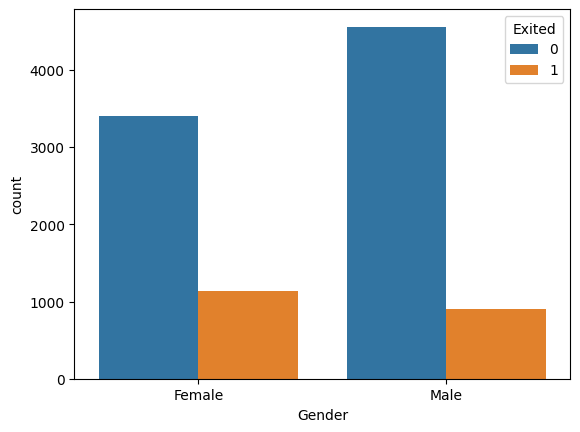

In [171]:
sns.countplot(df,x=df['Gender'],hue=df['Exited'])

In [186]:
X=df.drop(['Exited','RowNumber','CustomerId','Surname'],axis=1)
y=df['Exited']
X=pd.get_dummies(X,drop_first=True)

In [190]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.80,stratify=y,random_state=11)


In [192]:
x_train

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
6614          689   34       1  165312.27              1          1   
2694          628   29       3  113146.98              2          0   
7439          432   27       6   62339.81              2          0   
3062          582   40       9       0.00              3          1   
1902          773   33      10       0.00              1          1   
...           ...  ...     ...        ...            ...        ...   
390           712   29       7  147199.07              1          1   
9014          596   60       7  121907.97              1          0   
8031          666   36       6       0.00              2          1   
9153          507   36       9  118214.32              3          1   
7317          727   59       5  152581.06              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
6614               0        155495.63                  0                0   
2694               1        124749.08                  1                0   
7439               0         53874.67                  0                0   
3062               1         60954.45                  0                0   
1902               1         98820.09                  0                1   
...              ...              ...                ...              ...   
390                1         84932.40                  1                0   
9014               1         30314.04                  0                1   
8031               0        176692.87                  0                1   
9153               0        119110.03                  1                0   
7317               0         71830.10                  1                0   

      Gender_Male  
6614            1  
2694            1  
7439            0  
3062            0  
1902            0  
...           ...  
390             0  
9014            1  
8031            0  
9153            1  
7317            1  

[8000 rows x 11 columns]

In [199]:
from sklearn.preprocessing import RobustScaler
r_scaler=RobustScaler()
x_train_scaled=r_scaler.fit_transform(x_train)
x_test_scaled=r_scaler.transform(x_test)

In [193]:
def create_model(ml_model , x_train , y_train , x_test , y_test ):
  model = ml_model
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print('evaluation on training \n ' , classification_report(y_train , model.predict(x_train)))
  print('evaluation on testing \n ' , classification_report(y_test ,y_pred))
  ConfusionMatrixDisplay.from_estimator(model,x_train,y_train)
  ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)

## Logistic Model

evaluation on training 
                precision    recall  f1-score   support

           0       0.83      0.96      0.89      6370
           1       0.60      0.21      0.31      1630

    accuracy                           0.81      8000
   macro avg       0.72      0.59      0.60      8000
weighted avg       0.78      0.81      0.77      8000

evaluation on testing 
                precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.58      0.22      0.32       407

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



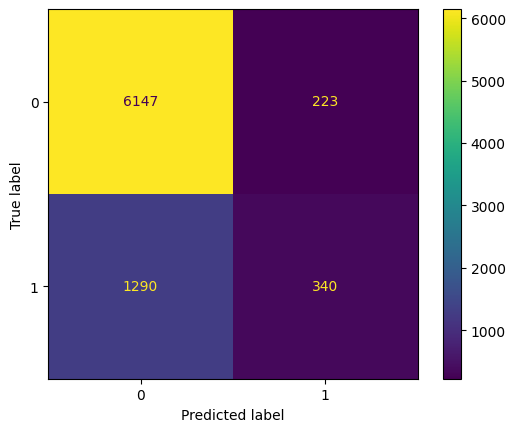

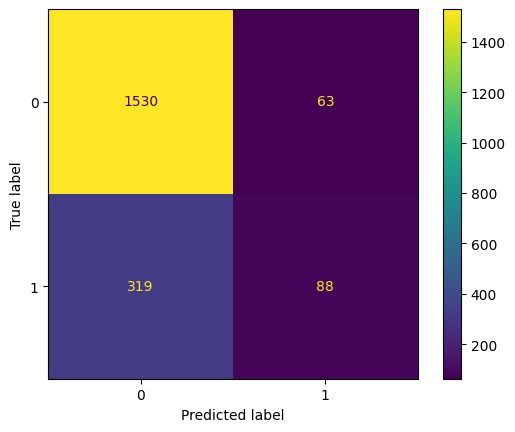

In [200]:
from sklearn.linear_model import LogisticRegression
lgr_model=LogisticRegression()
create_model(lgr_model , x_train_scaled , y_train , x_test_scaled , y_test )


## Logistic Regerssion with tuning paramters

evaluation on training 
                precision    recall  f1-score   support

           0       0.94      0.82      0.88      6370
           1       0.53      0.79      0.63      1630

    accuracy                           0.81      8000
   macro avg       0.73      0.80      0.75      8000
weighted avg       0.85      0.81      0.83      8000

evaluation on testing 
                precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.49      0.77      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



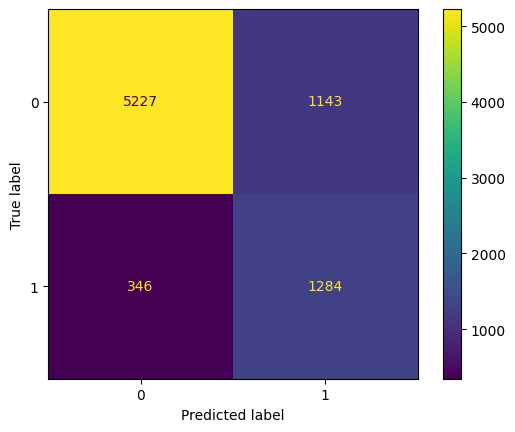

In [221]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
x_train_poly=poly.fit_transform(x_train_scaled)
x_test_poly=poly.transform(x_test_scaled)
lgr_model_tuned=LogisticRegression(class_weight ='balanced',solver='liblinear',dual=True)
create_model(lgr_model_tuned , x_train_poly , y_train , x_test_poly , y_test )


## Random Forest Classifier

evaluation on training 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

evaluation on testing 
                precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.50      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



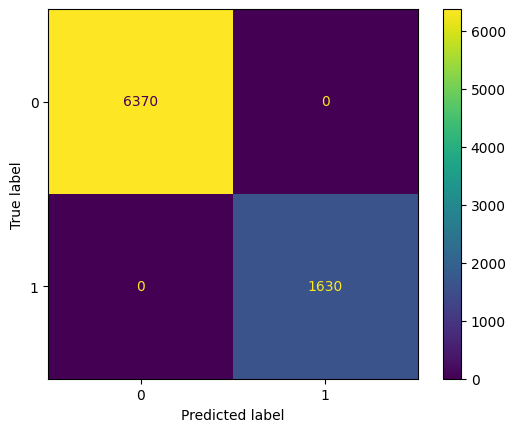

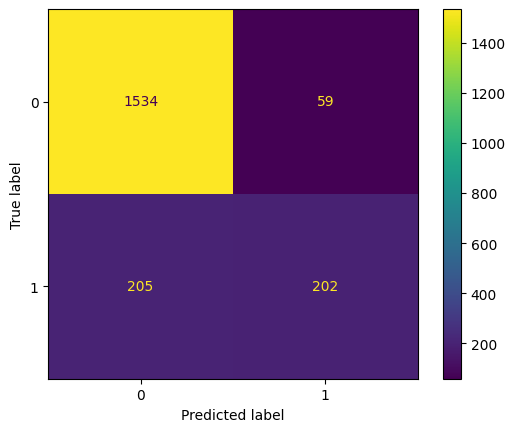

In [222]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
create_model(rfc_model,x_train,y_train,x_test,y_test)


## try Random Forest Clasifier with tuning parameters

evaluation on training 
                precision    recall  f1-score   support

           0       0.95      0.93      0.94      6370
           1       0.75      0.82      0.78      1630

    accuracy                           0.91      8000
   macro avg       0.85      0.88      0.86      8000
weighted avg       0.91      0.91      0.91      8000

evaluation on testing 
                precision    recall  f1-score   support

           0       0.91      0.90      0.91      1593
           1       0.63      0.67      0.65       407

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.78      2000
weighted avg       0.86      0.85      0.85      2000



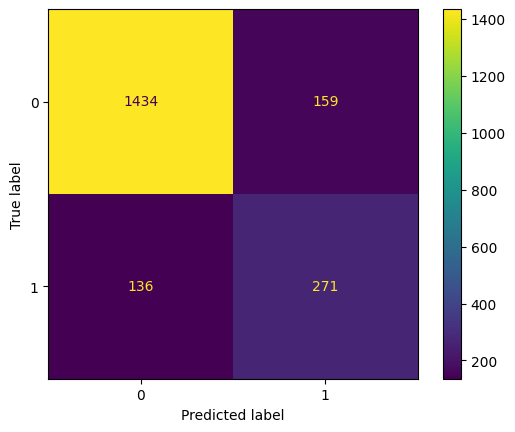

In [223]:
rfc_model_tuning=RandomForestClassifier(n_estimators=150,max_depth=10,class_weight='balanced')
create_model(rfc_model_tuning,x_train,y_train,x_test,y_test)

evaluation on training 
                precision    recall  f1-score   support

           0       0.95      0.90      0.92      6370
           1       0.68      0.81      0.74      1630

    accuracy                           0.88      8000
   macro avg       0.81      0.86      0.83      8000
weighted avg       0.89      0.88      0.89      8000

evaluation on testing 
                precision    recall  f1-score   support

           0       0.92      0.88      0.90      1593
           1       0.60      0.69      0.65       407

    accuracy                           0.84      2000
   macro avg       0.76      0.79      0.77      2000
weighted avg       0.85      0.84      0.85      2000



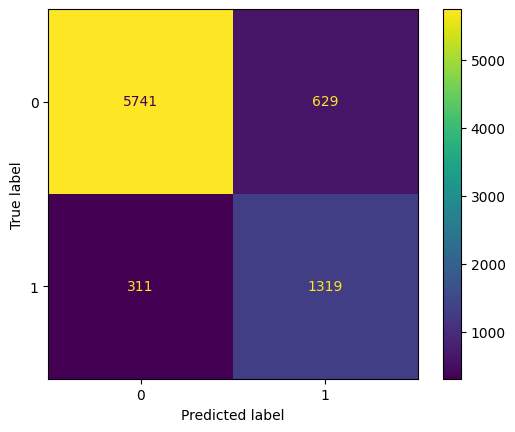

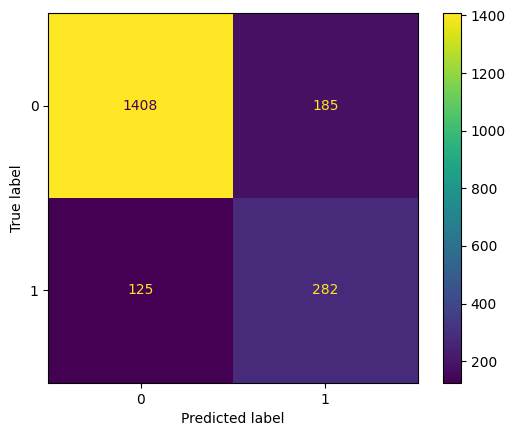

In [243]:
rfc_model_tuning=RandomForestClassifier(n_estimators=95,max_depth=9,class_weight='balanced')
create_model(rfc_model_tuning,x_train_scaled,y_train,x_test_scaled,y_test)

evaluation on training 
                precision    recall  f1-score   support

           0       0.96      0.94      0.95      6370
           1       0.79      0.84      0.81      1630

    accuracy                           0.92      8000
   macro avg       0.87      0.89      0.88      8000
weighted avg       0.92      0.92      0.92      8000

evaluation on testing 
                precision    recall  f1-score   support

           0       0.91      0.91      0.91      1593
           1       0.65      0.66      0.65       407

    accuracy                           0.86      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.86      0.86      0.86      2000



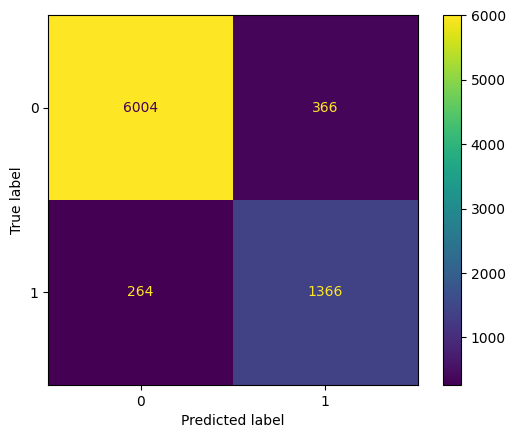

In [258]:
rfc_model_tuning=RandomForestClassifier(n_estimators=100,max_depth=11,class_weight='balanced')
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
x_train_poly=poly.fit_transform(x_train_scaled)
x_test_poly=poly.transform(x_test_scaled)
create_model(rfc_model_tuning,x_train_poly,y_train,x_test_poly,y_test)

## Support Vector Machine

evaluation on training 
                precision    recall  f1-score   support

           0       0.87      0.98      0.92      6370
           1       0.82      0.42      0.55      1630

    accuracy                           0.86      8000
   macro avg       0.84      0.70      0.74      8000
weighted avg       0.86      0.86      0.84      8000

evaluation on testing 
                precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.81      0.47      0.59       407

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



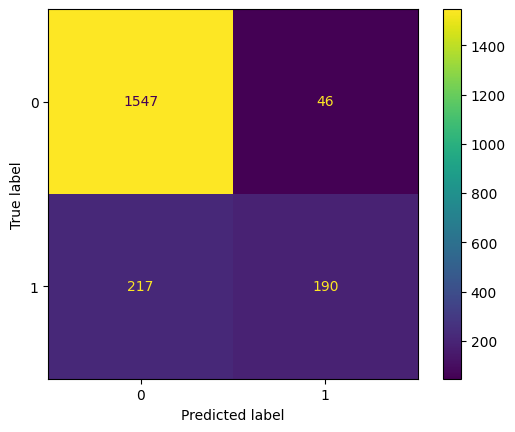

In [259]:
from sklearn.svm import SVC
svc_model=SVC()
create_model(svc_model,x_train_scaled,y_train,x_test_scaled,y_test)

## Support vector_machine with tuning parameters

evaluation on training 
                precision    recall  f1-score   support

           0       0.93      0.83      0.88      6370
           1       0.53      0.74      0.62      1630

    accuracy                           0.81      8000
   macro avg       0.73      0.79      0.75      8000
weighted avg       0.85      0.81      0.82      8000

evaluation on testing 
                precision    recall  f1-score   support

           0       0.93      0.83      0.88      1593
           1       0.53      0.76      0.62       407

    accuracy                           0.81      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.81      0.82      2000



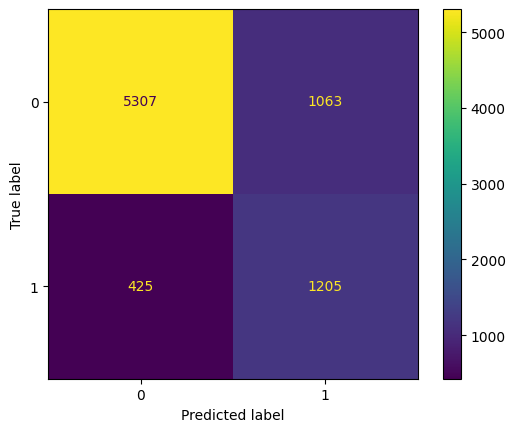

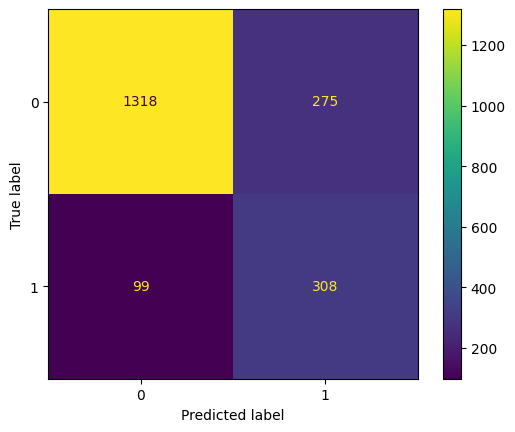

In [279]:
from sklearn.svm import SVC
svc_model_tuned=SVC(kernel='rbf',class_weight='balanced',decision_function_shape='ovr',break_ties=True,gamma='auto')
create_model(svc_model_tuned,x_train_scaled,y_train,x_test_scaled,y_test)

## xgb boost classifier

evaluation on training 
                precision    recall  f1-score   support

           0       0.95      0.99      0.97      6370
           1       0.97      0.81      0.88      1630

    accuracy                           0.96      8000
   macro avg       0.96      0.90      0.93      8000
weighted avg       0.96      0.96      0.96      8000

evaluation on testing 
                precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.73      0.51      0.60       407

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



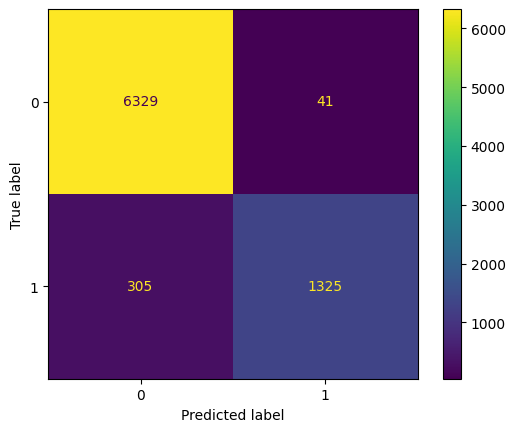

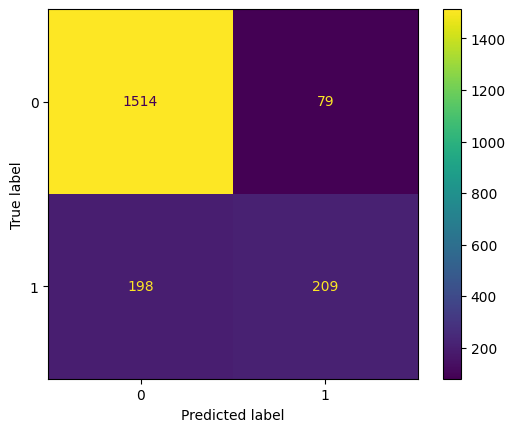

In [281]:
from xgboost import XGBClassifier
xgbc_model=XGBClassifier()
create_model(xgbc_model,x_train_scaled,y_train,x_test_scaled,y_test)



## XG boost classfier Tuned

evaluation on training 
                precision    recall  f1-score   support

           0       0.92      0.93      0.92      6370
           1       0.71      0.69      0.70      1630

    accuracy                           0.88      8000
   macro avg       0.82      0.81      0.81      8000
weighted avg       0.88      0.88      0.88      8000

evaluation on testing 
                precision    recall  f1-score   support

           0       0.91      0.92      0.91      1593
           1       0.66      0.63      0.64       407

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000



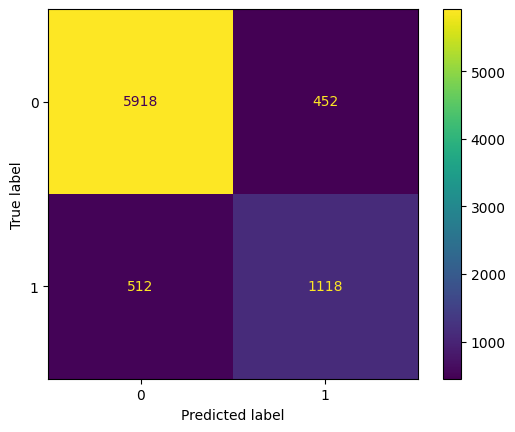

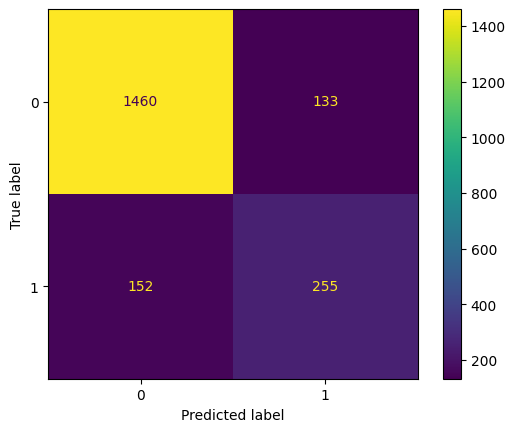

In [326]:
from xgboost import XGBClassifier
xgbc_model_tuned=XGBClassifier(booster='gbtree',eta=.3,max_depth=3,tree_method='hist',scale_pos_weight=2,max_bin=400)
poly = PolynomialFeatures(degree = 1, interaction_only=False, include_bias=False)
x_train_poly=poly.fit_transform(x_train_scaled)
x_test_poly=poly.transform(x_test_scaled)
create_model(xgbc_model_tuned,x_train_poly,y_train,x_test_poly,y_test)